# SIMULACIÓN DE TIEMPOS DE ESPERA DE TROMPOS EN UNA PLANTA DE CONCRETO

---

## Objetivos

- Simular cómo se comporta el sistema de carga de materiales en una planta de concreto.  
- Evaluar el tiempo promedio de espera de los camiones según la cantidad de silos en operación.  
- Analizar distintos escenarios con tiempos de llegada y carga aleatorios para proponer mejoras.

---

## Descripción del problema

En una planta de concreto es común que lleguen varios camiones durante el día para cargar materiales como cemento, grava o arena. Cuando hay pocos silos en funcionamiento o cuando los camiones llegan con poca separación entre sí, se pueden formar filas y aumentar los tiempos de espera.  

Este tipo de situaciones es importante en la programación de obra y logística, ya que los retrasos pueden afectar directamente el avance del proyecto. Por eso, es útil analizar este sistema usando simulación y ver cómo responden los tiempos de espera ante distintos escenarios.

---

## Modelo del problema

Para este proyecto se utilizó el método de **Simulación de Monte Carlo**, ya que permite analizar sistemas con variables aleatorias sin necesidad de datos reales. Se eligió este enfoque para simular cómo se comporta una planta de concreto que atiende a varios camiones a lo largo del día.

El sistema simula la **carga de materiales**  desde silos hacia camiones trompo que llegan de manera aleatoria. Al no contar con datos reales, se generaron los tiempos de llegada y de carga usando **distribuciones uniformes**.

### Variables consideradas

- `n_camiones` → número total de camiones (20)
- `n_silos` → cantidad de silos disponibles (2)
- `tiempo_llegada` → tiempo aleatorio entre 0 y 60 minutos
- `tiempo_carga` → tiempo aleatorio entre 5 y 10 minutos
- `espera` → diferencia entre el tiempo de llegada y el inicio de carga
- `inicio_carga` → instante en que el camión comienza a cargar según disponibilidad del silo

### Supuestos del modelo

- Los camiones **llegan uno por uno** a lo largo del tiempo (no todos al mismo tiempo).
- **Solo un camión puede ser atendido por un silo a la vez.**
- No hay fallas, interrupciones ni mantenimiento durante la simulación.
- Todos los camiones reciben **el mismo tipo de carga**, por lo que cualquier silo puede atenderlos.
- **No hay prioridad entre camiones**, se atienden en orden de llegada y disponibilidad.

Este modelo busca representar de forma sencilla y controlada una situación que ocurre en muchas obras reales, permitiendo evaluar el impacto del número de silos en el tiempo total de espera.


---

## Justificación de la distribución utilizada

Como queremos simular situaciones realistas donde no tenemos datos exactos, usamos **distribuciones uniformes** para generar los tiempos de llegada y de carga. Esto nos da valores aleatorios dentro de un rango (por ejemplo, de 1 a 5 minutos), que representan bien la variabilidad que hay en este tipo de procesos.

Elegimos la distribución uniforme porque es simple, fácil de aplicar, y suficiente para observar comportamientos generales del sistema de carga.

---


## PASO 1: DEFINIR PARÁMETROS DE LA SIMULACIÓN

Para empezar, vamos a fijar los datos con los que vamos a trabajar:

- Vamos a simular **20 camiones** que llegan a la planta.
- Hay **2 silos disponibles** para cargar el material.
- Los **tiempos de llegada** de los camiones serán aleatorios entre **0 y 60 minutos**.
- Los **tiempos de carga** de cada camión también serán aleatorios, entre **5 y 10 minutos**.

Estos valores se van a generar usando una **distribución uniforme**, ya que queremos simular diferentes situaciones posibles sin tener datos reales.  
La idea es ver cómo se comporta el sistema con esos datos y más adelante probar si cambiar el número de silos mejora los tiempos de espera.

---


## PASO 2: SIMULACION DE MONTECARLO

En este paso vamos a crear los tiempos de llegada y carga para los 20 camiones.  
Vamos a usar numpy para generar estos datos de forma aleatoria:

- Las llegadas serán números aleatorios entre 0 y 60 minutos.
- Los tiempos de carga serán aleatorios entre 5 y 10 minutos.

Así podemos representar de forma sencilla un día de trabajo en la planta.

Fijamos una semilla con el número 123 para que la simulación sea **reproducible**, es decir, que siempre nos dé los mismos resultados cuando volvamos a correrla.


Tiempo promedio de espera (media de 100 simulaciones): 9.34 minutos


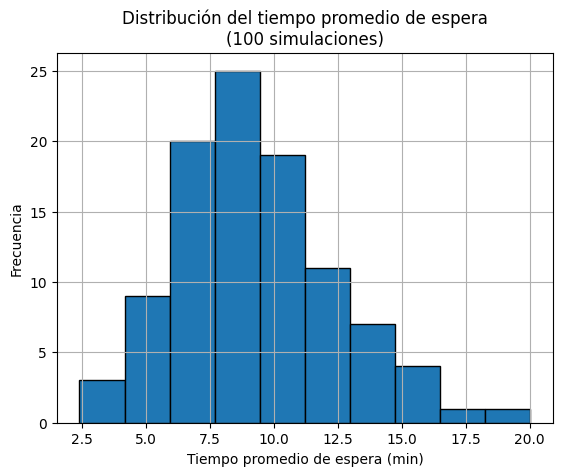

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para simular el tiempo de espera usando Monte Carlo
def simulacion_montecarlo(n_camiones=20, n_silos=2, repeticiones=100):
    promedios_espera = [] 

    for _ in range(repeticiones):
        # Crear tiempos aleatorios para la llegada y carga de los camiones
        llegada = np.random.uniform(0, 60, n_camiones)  
        carga = np.random.uniform(5, 10, n_camiones)    

        df = pd.DataFrame({
            'Llegada': llegada,
            'Carga': carga
            })

        df = df.sort_values(by='Llegada').reset_index(drop=True)

        # Inicializar las columnas de "Inicio" y "Espera"
        df['Inicio'] = 0.0  
        df['Espera'] = 0.0  

        # Crear una lista para simular el tiempo de ocupación de los silos
        silos = [0.0] * n_silos  

        # Simular el proceso de carga para cada camión
        for i in range(n_camiones):
            t_llegada = df.loc[i, 'Llegada']  
            t_carga = df.loc[i, 'Carga']    

            # Ver qué silo está disponible (el primero que se libera)
            silo_disponible = np.argmin(silos) 
            libre = silos[silo_disponible]      

            # El camión empieza a cargar cuando llega o cuando el silo está libre (lo que pase después)
            inicio = max(t_llegada, libre)  
            espera = inicio - t_llegada  

            # Guardamos los tiempos de inicio y espera para este camión
            df.loc[i, 'Inicio'] = inicio
            df.loc[i, 'Espera'] = espera

            # Actualizamos cuándo quedará libre este silo
            silos[silo_disponible] = inicio + t_carga  

        # Calculamos el tiempo promedio de espera para esta simulación y lo agregamos a la lista
        promedio_espera = df['Espera'].mean()
        promedios_espera.append(promedio_espera)

    return promedios_espera 

resultados = simulacion_montecarlo()

print(f"Tiempo promedio de espera (media de 100 simulaciones): {np.mean(resultados):.2f} minutos")

plt.hist(resultados, bins=10, edgecolor='black')
plt.title('Distribución del tiempo promedio de espera\n(100 simulaciones)')
plt.xlabel('Tiempo promedio de espera (min)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Tiempo promedio de espera (media de 100 simulaciones): 1.87 minutos


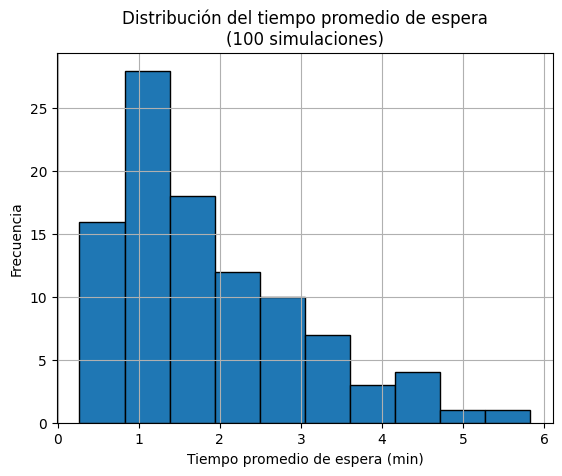

In [20]:

# Función para simular el tiempo de espera usando Monte Carlo pero con 3 silos 
def simulacion_montecarlo(n_camiones=20, n_silos=3, repeticiones=100):
    promedios_espera = [] 

    for _ in range(repeticiones):
        # Crear tiempos aleatorios para la llegada y carga de los camiones
        llegada = np.random.uniform(0, 60, n_camiones)  
        carga = np.random.uniform(5, 10, n_camiones)    

        df = pd.DataFrame({
            'Llegada': llegada,
            'Carga': carga
            })

        df = df.sort_values(by='Llegada').reset_index(drop=True)

        # Inicializar las columnas de "Inicio" y "Espera"
        df['Inicio'] = 0.0  
        df['Espera'] = 0.0  

        # Crear una lista para simular el tiempo de ocupación de los silos
        silos = [0.0] * n_silos  

        # Simular el proceso de carga para cada camión
        for i in range(n_camiones):
            t_llegada = df.loc[i, 'Llegada']  
            t_carga = df.loc[i, 'Carga']    

            # Ver qué silo está disponible (el primero que se libera)
            silo_disponible = np.argmin(silos) 
            libre = silos[silo_disponible]      

            # El camión empieza a cargar cuando llega o cuando el silo está libre (lo que pase después)
            inicio = max(t_llegada, libre)  
            espera = inicio - t_llegada  

            # Guardamos los tiempos de inicio y espera para este camión
            df.loc[i, 'Inicio'] = inicio
            df.loc[i, 'Espera'] = espera

            # Actualizamos cuándo quedará libre este silo
            silos[silo_disponible] = inicio + t_carga  

        # Calculamos el tiempo promedio de espera para esta simulación y lo agregamos a la lista
        promedio_espera = df['Espera'].mean()
        promedios_espera.append(promedio_espera)

    return promedios_espera 

resultados = simulacion_montecarlo()

print(f"Tiempo promedio de espera (media de 100 simulaciones): {np.mean(resultados):.2f} minutos")

plt.hist(resultados, bins=10, edgecolor='black')
plt.title('Distribución del tiempo promedio de espera\n(100 simulaciones)')
plt.xlabel('Tiempo promedio de espera (min)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


## PASO 3: ANÁLISIS Y VISUALIZACIÓN DE RESULTADOS

Después de realizar **100 simulaciones** con el método de **Monte Carlo**, fue posible observar cómo varía el comportamiento del sistema de carga de camiones. En general, los tiempos de espera se concentraron en un rango entre **6 y 12 minutos**, aunque en algunos casos se alcanzaron esperas más largas. Esto sugiere que, si bien el sistema funciona de forma aceptable, aún existe margen para optimizar su eficiencia. 

Con base en esta simulación, se pueden tomar decisiones como evaluar la necesidad de más silos o buscar un mejor control en los horarios de llegada para evitar acumulaciones y tiempos muertos.

---

# COMPARACION DE RESULTADOS DE PLANTA CON 2 Y 3 SILOS 
# (PROS Y CONS)

**Conclusiones del análisis: ¿Es necesario adquirir un tercer silo?**
Tras realizar 100 simulaciones mediante el método de Monte Carlo, se analizaron dos escenarios en una planta de concreto:

Con 2 silos: Tiempo promedio de espera de los camiones = 9.34 minutos

Con 3 silos: Tiempo promedio de espera de los camiones = 1.87 minutos

A simple vista, se observa una reducción considerable del tiempo promedio de espera al pasar de 2 a 3 silos. Sin embargo, este cambio debe evaluarse con base en costos reales, la frecuencia de uso y la capacidad operativa de la empresa.


1. Reducción del tiempo vs. costo de inversión
Un silo de concreto con capacidad de 100 toneladas puede tener un costo aproximado de entre $400,000 y $700,000 MXN, dependiendo del fabricante, diseño, materiales y sistema de descarga (Silos Córdoba, 2023). Esta inversión debe justificarse con un retorno en eficiencia que impacte de forma significativa en la productividad.

Reducir el tiempo promedio de espera de 9.34 a 1.87 minutos podría parecer atractivo, pero este beneficio solo es crítico si la planta opera a alta demanda durante todo el día, donde incluso unos minutos por camión pueden traducirse en una fila de espera constante.

2. Evaluación por tipo de empresa y nivel de demanda
Para una empresa con demanda baja o moderada (menos de 20–30 camiones por día), el sistema con 2 silos es suficiente. Aunque algunos camiones esperen algunos minutos, esto no compromete la operación ni genera cuellos de botella importantes.

En cambio, si se trata de una empresa de alta rotación que atiende 50 o más camiones por día, el tiempo de espera acumulado puede afectar entregas, aumentar el uso de combustible por camión detenido y hasta generar conflictos contractuales por demoras.

En ese contexto, la decisión de invertir en un nuevo silo debe considerar el costo-beneficio ajustado a la escala y flujo real de trabajo de cada planta.

3. Consideraciones logísticas y operativas
Además del costo del silo, es importante contemplar:

- Espacio físico disponible en la planta

- Costo de instalación y adecuaciones estructurales

- Mantenimiento preventivo adicional

- Uso efectivo del silo (no sirve tener más capacidad si no hay demanda suficiente)

**Conclusión general**
Aunque las simulaciones muestran una mejora en el tiempo promedio de espera con tres silos, la diferencia no justifica automáticamente una inversión costosa si la demanda diaria es manejable con dos silos.
Por lo tanto, la decisión debe tomarse con base en:

- Un análisis real de flujo de camiones

- La proyección de crecimiento de la empresa

- Equilibrio entre inversión, espacio, mantenimiento y beneficios operativos

---

# Referencias
Silos Córdoba. (2023). Catálogo de productos: silos metálicos para cemento y materiales granulados. Recuperado de https://siloscordoba.com/es/

Montgomery, D. C. (2020). Design and Analysis of Experiments (10ª ed.). Wiley. [PDF]

Law, A. M., & Kelton, W. D. (2015). Simulation Modeling and Analysis (5ª ed.). McGraw-Hill Education.[PDF]

Secretaría de Economía. (2022). Costos promedio de maquinaria y equipo en la industria de la construcción. Gobierno de México. [PDF]
